In [26]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from fit_spectra import cube_fit_element
from display import plot_example_spectra, plot_rgb_image
from constants import EmissionLines

Ha = EmissionLines.H_ALPHA[0]
Nii_1 = EmissionLines.N_II[0]
Nii_2 = EmissionLines.N_II[1]

### Load and Extract Data

In [27]:
file = 'manga-12510-12701-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    true_z = cube[0].header['EBVGAL']

### Image of Galaxy

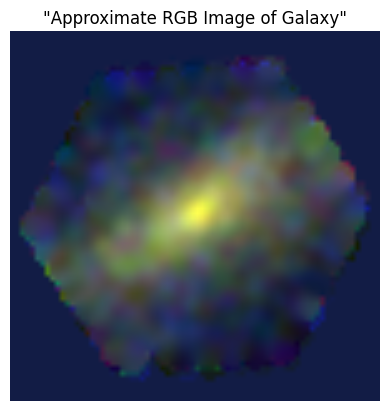

In [28]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

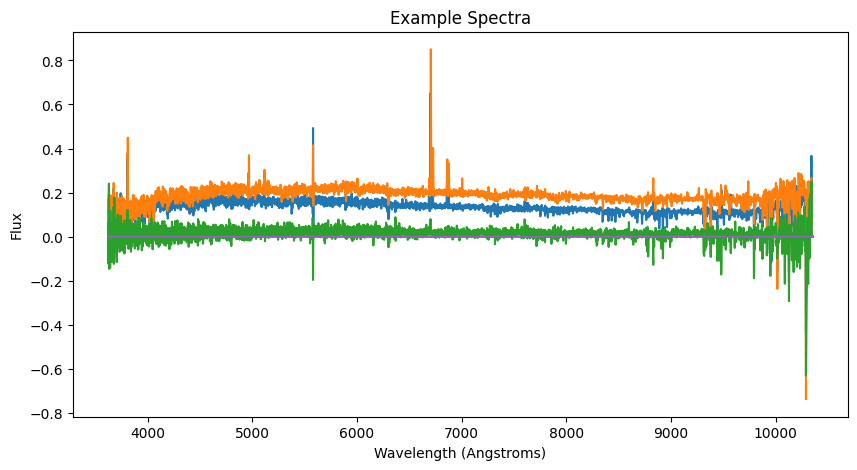

In [29]:
plot_example_spectra(flux, wave, n=5)

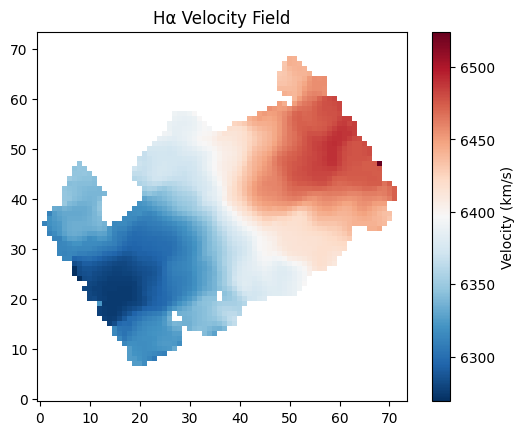

In [30]:
vel_map, flux_map, wave_map, z_map, popt_map = cube_fit_element(flux, wave, lambda_rest=Ha, threshold=0.1, window_centre=6705, ws=15, std=0.5)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=None, vmax=None)
plt.colorbar(label="Velocity (km/s)")
plt.title("Hα Velocity Field")
plt.show()

### Calculate Galaxy Redshift

In [31]:
calculated_z = np.nanmean(z_map)

error = np.abs(calculated_z - true_z) / (true_z)

print(f"Calculated Redshift: {calculated_z:.4f}")
print(f"True Redshift: {true_z:.4f}")
print(f"Relative Error: {error:.2%}")

Calculated Redshift: 0.0215
True Redshift: 0.0252
Relative Error: 14.70%


### Load and Extract Data

In [32]:
file = 'manga-12491-12704-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    true_z = cube[0].header['EBVGAL']

### Image of Galaxy

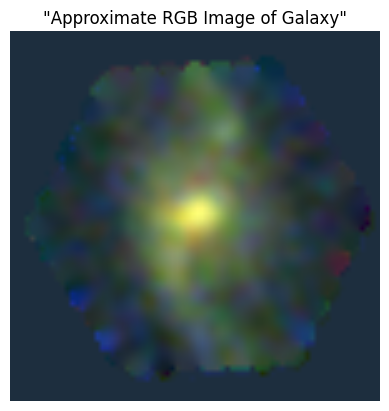

In [33]:
plot_rgb_image(flux, wave, b_scale=0.6)

### Plot Example Spectrum

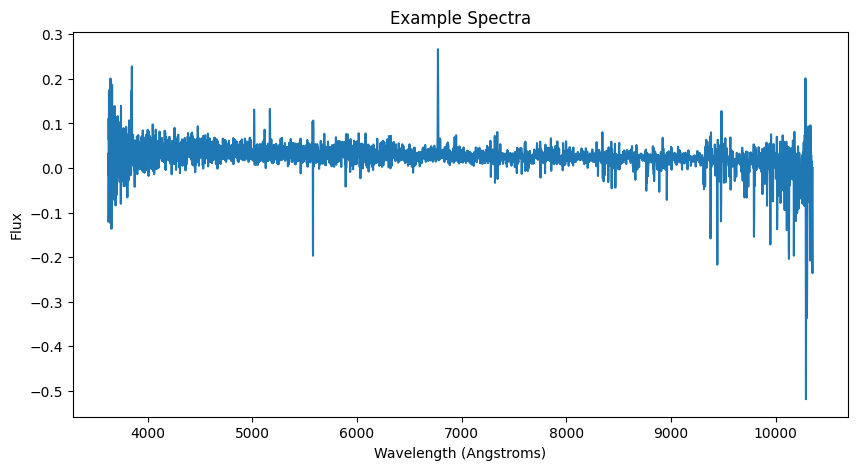

In [34]:
plot_example_spectra(flux, wave)

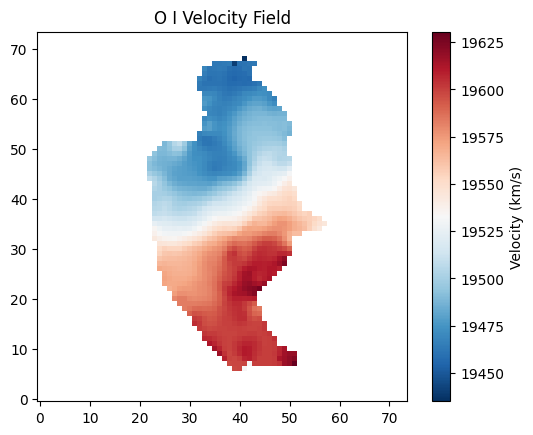

In [44]:
Oi_2 = EmissionLines.O_I[1]

vel_map, flux_map, wave_map, z_map, popt_map = cube_fit_element(flux, wave, lambda_rest=Oi_2, window_centre=6792, threshold=0.12, ws=10, std=1)

plt.imshow(vel_map, origin='lower', cmap='RdBu_r', vmin=None, vmax=None)
plt.colorbar(label="Velocity (km/s)")
plt.title("O I Velocity Field")
plt.show()

### Calculate Galaxy Redshift

In [45]:
calculated_z = np.nanmean(z_map)

error = np.abs(calculated_z - true_z) / (true_z)

print(f"Calculated Redshift: {calculated_z:.4f}")
print(f"True Redshift: {true_z:.4f}")
print(f"Relative Error: {error:.2%}")

Calculated Redshift: 0.0674
True Redshift: 0.0632
Relative Error: 6.73%
